# Coursework 2: Neural Networks 

This coursework covers the topics covered in class regarding neural networks for image classification.

This coursework includes both coding questions as well as written ones. Please upload the notebook, which contains your code, results and answers as a pdf file onto Cate.

Dependencies: If you work on a college computer in the Computing Lab, where Ubuntu 18.04 is installed by default, you can use the following virtual environment for your work, where relevant Python packages are already installed.

`source /vol/bitbucket/wbai/virt/computer_vision_ubuntu18.04/bin/activate`

Alternatively, you can use pip, pip3 or anaconda etc to install Python packages.

**Note 1:** please read the both the text and code comment in this notebook to get an idea what you are supposed to implement.

**Note 2:** If you are using the virtual environment in the Computing Lab, please run the following command in the command line before opening jupyter-notebook and importing tensorflow. This will tell tensorflow where the Nvidia CUDA libariries are.

`export LD_LIBRARY_PATH=/vol/cuda/9.0.176/lib64/:"${LD_LIBRARY_PATH}}"` 

In [519]:
# Import libraries
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from reader import get_images
import itertools
plt.rcParams["figure.figsize"] = (10,7)

## Question 1 (20 points)

Throughout this coursework you will be working with the Fashion-MNIST dataset. If you are interested, you may find relevant information regarding the dataset in this paper.

[1] Fashion-MNIST: A novel image dataset for benchmarking machine learning algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

Be sure that you have the following files in your working directory: data.tar.gz and reader.py. Loading the data can be done as follows:

`from reader import get_images
(x_train, y_train), (x_test, y_test) = get_images()`

The dataset is already split into a set of 60,000 training images and a set of 10,000 test images. The images are of size 28x28 pixels and stored as 784-D vector. So if you would like to visualise the images, you need to reshape the array.

There are in total 10 label classes, which are:
* 0: T-shirt/top
* 1: Trousers
* 2: Pullover
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle boot

### 1.1 Load data (6 points)
Load the dataset and print the dimensions of the training set and the test set.

In [520]:
(x_train, y_train), (x_test, y_test) = get_images()


In [521]:
print("Training Set - shape of x : {}  - shape of y : {} ".format(np.shape(x_train) ,np.shape(y_train)))
print("Test Set     - shape of x : {}  - shape of y : {} ".format(np.shape(x_test) ,np.shape(y_test)))
N_train = len(y_train)
N_test = len(y_test)
N_features = np.shape(x_train)[1]
S_image = int(np.sqrt(N_features))
print("\nEach image has {} features".format(N_features))


Training Set - shape of x : (60000, 784)  - shape of y : (60000,) 
Test Set     - shape of x : (10000, 784)  - shape of y : (10000,) 

Each image has 784 features


In [522]:
classes = np.array(["T-shirt/top","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"])

### 1.2 Visualize data (6 points)
Visualise 3 training images (T-shirt, trousers and pullover) and 3 test images (dress, coat and sandal).

In [527]:
# Labels wanted for each set
y_disp_train = [0,1,2]
y_disp_test = [3,4,5]

# Masks of the images for each label
m_disp_train =[y_train == y_disp_train[i] for i in range(len(y_disp_train))]
m_disp_test =[y_test == y_disp_test[i] for i in range(len(y_disp_test))]

# Indexes of the images for each label
i_temp_train = np.array(range(N_train))
i_temp_test = np.array(range(N_test))
i_all_train = [i_temp_train[m_disp_train[i]] for i in range(len(y_disp_train))]
i_all_test = [i_temp_test[m_disp_test[i]] for i in range(len(y_disp_test))]

# Choice of the Index of each label :
i_disp_train = [np.random.choice(i_all_train[i]) for i in range(len(y_disp_train))]
i_disp_test = [np.random.choice(i_all_test[i]) for i in range(len(y_disp_test))]

In [528]:
print("The indexes of the training image we are displaying is : {}".format(i_disp_train))
print("The indexes of the test image we are displaying is : {}".format(i_disp_test))

The indexes of the training image we are displaying is : [27976, 42781, 35921]
The indexes of the test image we are displaying is : [7105, 9894, 1092]


In [529]:
def plot_image(X):
    plt.imshow(np.reshape(X,(S_image,S_image)), cmap='gray')

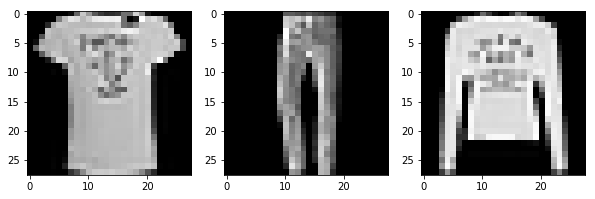

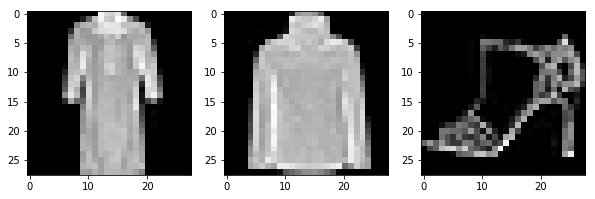

In [530]:
plt.figure()
plt.subplot(131)
plot_image(x_train[i_disp_train[0]])
plt.subplot(132)
plot_image(x_train[i_disp_train[1]])
plt.subplot(133)
plot_image(x_train[i_disp_train[2]])

plt.figure()

plt.subplot(131)
plot_image(x_test[i_disp_test[0]])
plt.subplot(132)
plot_image(x_test[i_disp_test[1]])
plt.subplot(133)
plot_image(x_test[i_disp_test[2]])


### 1.3 Data balance (4 points)
Print out the number of training samples for each class.

The number of samples per label is : [6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]


<BarContainer object of 10 artists>

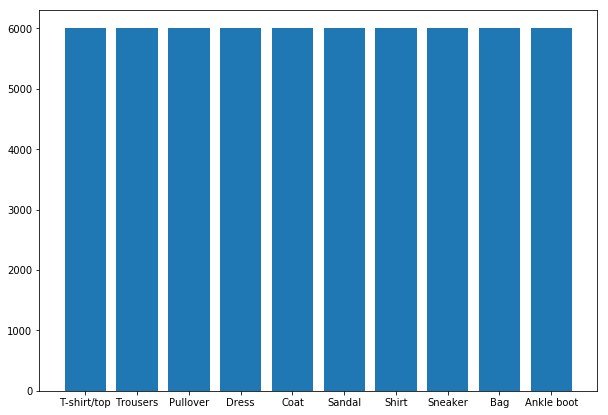

In [532]:
y_balance = list(range(10))
m_balance =[y_train == y_balance[i] for i in range(len(y_balance))]
i_temp_train = np.array(range(N_train))
i_balance = [i_temp_train[m_balance[i]] for i in range(len(y_balance))]
n_samples_balance = [len(i_balance[i]) for i in range(len(y_balance))]
print("The number of samples per label is : {}".format(n_samples_balance))

plt.bar(classes,n_samples_balance)

### 1.4 Discussion (4 points)
Is the dataset balanced? What would happen if the dataset is not balanced in the context of image classification? 

**Answer** : As we can see the training dataset is perfectly balanced between labels. Each of the labels has 6000 samples. In the context of image classification, this is really important because an unbalanced dataset would lead to biased results. For example if there were much more sneakers, the training would recognised a lot more sneakers that its supposed to do in the test set. 

## Question 2 (40 points)

Build a neural network and train it with the Fashion-MNIST dataset. Here, we use the keras library, which is a high-level neural network library built upon tensorflow.

In [126]:
# Convert the label class into a one-hot representation
num_classes = len(y_balance)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### 2.1 Build a multi-layer perceptron, also known as multi-layer fully connected network. You need to define the layers, the loss function, the optimiser and evaluation metric. (30 points)

In [196]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_37 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_38 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


### 2.2 Define the optimisation parameters including the batch size and the number of epochs and then run the optimiser. (10 points)

We have tested that for an appropriate network architecture, on a personal laptop and with only CPU, it takes about a few seconds per epoch to train the network. For 100 epochs, it takes about a coffee break's time to finish the training. If you run it on a powerful GPU, it would be even much faster.

In [198]:
batch_size = 1000
epochs = 100
model.fit(x_train, y_train,
          epochs=epochs,
          batch_size=batch_size)

Epoch 1/100
60000/60000 [==============================] - 3s 52us/step - loss: 11.1183 - acc: 0.3086
Epoch 2/100
60000/60000 [==============================] - 3s 52us/step - loss: 10.1363 - acc: 0.3687
Epoch 3/100
60000/60000 [==============================] - 3s 52us/step - loss: 10.0294 - acc: 0.3753
Epoch 4/100
60000/60000 [==============================] - 3s 52us/step - loss: 10.0304 - acc: 0.3751
Epoch 5/100
60000/60000 [==============================] - 3s 52us/step - loss: 9.9634 - acc: 0.3795
Epoch 6/100
60000/60000 [==============================] - 3s 53us/step - loss: 9.9556 - acc: 0.3800
Epoch 7/100
60000/60000 [==============================] - 3s 53us/step - loss: 8.0342 - acc: 0.4966
Epoch 8/100
60000/60000 [==============================] - 3s 53us/step - loss: 7.1966 - acc: 0.5486
Epoch 9/100
60000/60000 [==============================] - 3s 53us/step - loss: 7.0593 - acc: 0.5573
Epoch 10/100
60000/60000 [==============================] - 3s 54us/step - loss: 6.6445

## Question 3 (20 points) 

Evaluate the performance of your network with the test data. 
Visualize the performance using appropriate metrics and graphs (eg. confusion matrix). 
Comment on your per class performance and how it could be better.

In [401]:
# This function is provided for you to display the confusion matrix.
# For more information about the confusion matrix, you can read at
# https://en.wikipedia.org/wiki/Confusion_matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):
    """
        This function prints and plots the confusion matrix.
        
        cm: confusion matrix, default to be np.int32 data type
        classes: a list of the class labels or class names
        normalize: normalize the matrix so that each row amounts to one
        cmap: color map
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### 3.1 Evaluate the classification accuracy on the test set (10 points)

In [402]:
score = model.evaluate(x_test, y_test, batch_size=150)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 27us/step
Test loss: 0.6631677290797233
Test accuracy: 0.8639000055193901


### 3.2 Calculate and plot the confusion matrix (10 points)

Confusion matrix, without normalization
[[842   1  14  23   4   0  82   0   8   0]
 [  1 971   3  16   3   0   3   0   1   0]
 [ 22   2 772   6 104   1  45   0   6   0]
 [ 35  15   9 855  36   1  18   0   4   1]
 [  2   1 107  32 798   0  21   0   4   0]
 [  1   0   1   2   0 944   1  31   5  13]
 [164   1  96  30 117   0 518   0  14   0]
 [  0   0   0   0   0  23   0 944   1  32]
 [  4   0   4   5   2   3  10   5 962   0]
 [  0   0   0   0   0  11   1  36   0 952]]


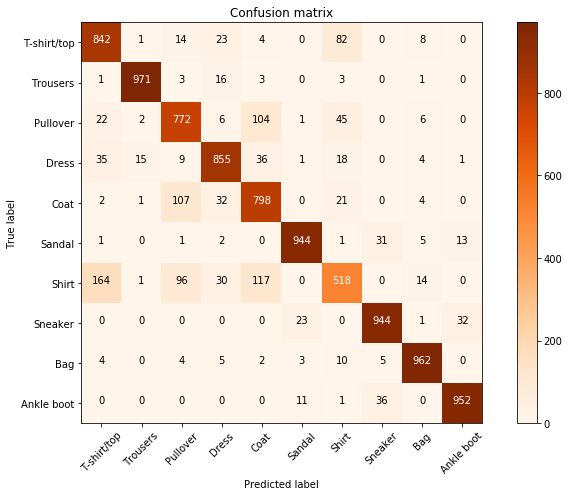

In [496]:
y_pred = np.round(model.predict(x_test, batch_size=150))

def my_confusion_matrix(y_pred,y_test):
    
    cm = np.zeros((np.shape(y_test)[1],np.shape(y_test)[1])) 
    for i in range(np.shape(y_test)[1]):
        
        for j in range(np.shape(y_test)[1]):
            cm[i,j]= np.sum(y_pred[:,j] * y_test[:,i])
            cm[j,i]= np.sum(y_pred[:,i] * y_test[:,j])
    #print(cm)
    return cm.astype(int)
#my_confusion_matrix(y_pred,y_test);
plot_confusion_matrix(my_confusion_matrix(y_pred,y_test),classes)

## Question 4 (20 points)
Take two photos, one of your clothes or shoes that belongs to one of 10 classes, the other that does not belong to any class.

Use either Python or other software (Photoshop, Gimp, or any image editer) to convert the photos into grayscale, crop the region of interest and reshape into the size of 28x28.

### 4.1 Load and visualise your own images (6 points)

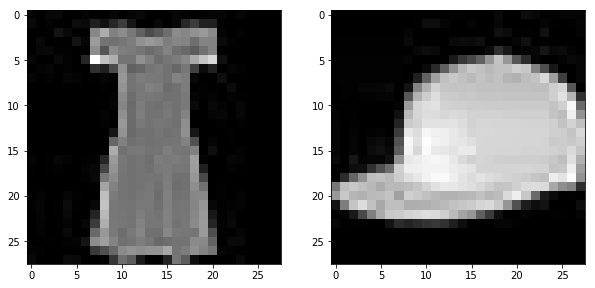

In [513]:
import imageio

# Function to load images
def load_own_image(path,invert):
    ''' This function loads the pictures grayscale pictures, 
    selecteds one color channel, print it and 
    and invert them if necessary
    '''
    
    image = imageio.imread(path)
    image = image[:,:,0]

    image = np.reshape(image,(N_features,)).astype(int).transpose()

    if invert: # inverting image (black background)
        image = 255 - np.array(image)

    plt.imshow(np.reshape(image,(S_image,S_image)), cmap='gray')
    return image.tolist()

# Loading Pictures : 
plt.figure()
x_mytest = []

# Picture 1 : a red dress (in the classes)
plt.subplot(121)
x_mytest.append( load_own_image('myPictures/dress2.jpeg',True))

# Picture 2 : 
plt.subplot(122)
x_mytest.append( load_own_image('myPictures/casquette.jpeg',True));

x_mytest = np.array(x_mytest)

### 4.2 Test your network on the two images and show the classification results (10 points)

In [514]:
y_mytest_pred = np.round(model.predict(x_mytest)).astype(int)
print("The First Image is classified as a : {}".format(classes[y_mytest_pred[0,:]==1][0]))
print("The Second Image is classified as a : {}".format(classes[y_mytest_pred[1,:]==1][0]))


The First Image is classified as a : Dress
The Second Image is classified as a : Sneaker


### 4.3 Discuss the classification results and provide one method to improve real life performance of the network (4 points)

**Answer** : The classification works quite well in the case where the image class is known. In the case where the label is unknown, the neuronal network fails to classify it properly.

We can observe with the confusion matrix that the classification already works very well, at the expection of the shirt class which has a lot of false negative. This is due to the high resemblance between shirts, T-shirts, Coats and Pullover. 

In order to improve the performance of the network, we could have chosen higher defintion images, increased the number of classes, or set slightly different neuronal network as the results for the test set is of 86% only (compared to the 96% on the test set). We could have impelemted a crossvalidation to test various parameters. 

## 5. Survey
How long did the coursework take you to solve? 

3.5 hours